In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [2]:
root = Path("nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/")

In [3]:
list(root.parts)

['nifti',
 'FDG-PET-CT-Lesions',
 'PETCT_0011f3deaf',
 '03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445']

In [4]:
list(root.glob("*"))

[WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CT.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/CTres.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/PET.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SEG.nii.gz'),
 WindowsPath('nifti/FDG-PET-CT-Lesions/PETCT_0011f3deaf/03-23-2003-NA-PET-CT Ganzkoerper  primaer mit KM-10445/SUV.nii.gz')]

In [5]:
PatientCT_Path = list(root.glob("CT*"))[0] 
PatientCTRes_Path = list(root.glob("CTres*"))[0] 
PatientPET_Path = list(root.glob("PET*"))[0] 
PatientSEG_Path = list(root.glob("SEG*"))[0] 
PatientSUV_Path = list(root.glob("SUV*"))[0] 

In [6]:
data = nib.load(PatientCT_Path)
ct = data.get_fdata()
data = nib.load(PatientCTRes_Path)
ctres = data.get_fdata()
data = nib.load(PatientPET_Path)
pet = data.get_fdata()
data = nib.load(PatientSEG_Path)
seg = data.get_fdata()
data = nib.load(PatientSUV_Path)
suv = data.get_fdata()

In [7]:
print("Shape:", ct.shape)
print("Data type:", ct.dtype)

Shape: (512, 512, 391)
Data type: float64


<IPython.core.display.Javascript object>


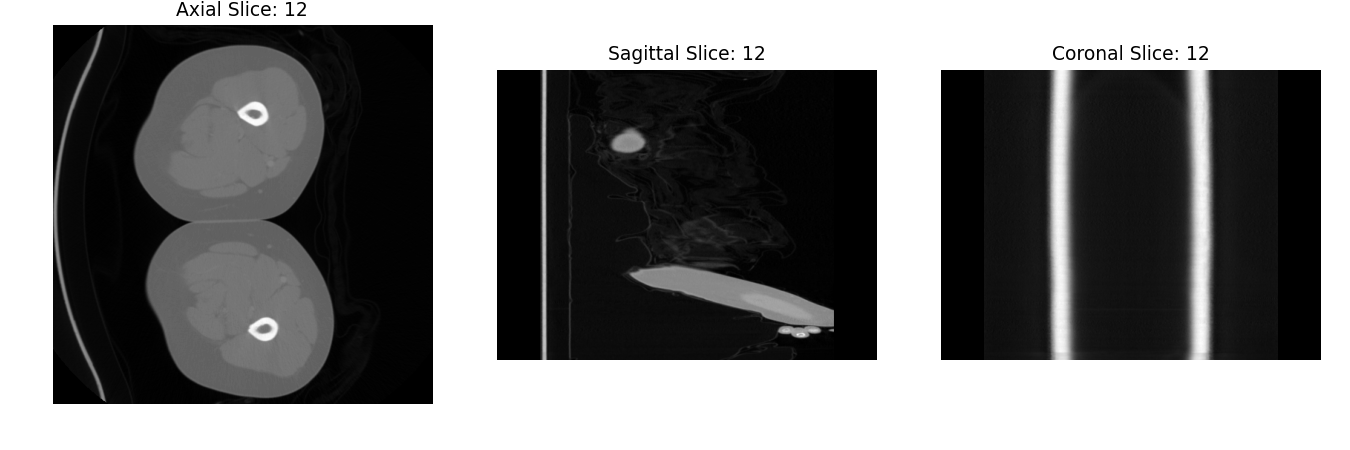

In [8]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

def update(frame):
    # Axial Slice
    ax[0].imshow(ct[:, :, frame], cmap='gray')
    ax[0].set_title(f"Axial Slice: {frame}")
    ax[0].axis('off')

    # Sagittal Slice
    sagittal_slice = frame
    ax[1].imshow(ct[sagittal_slice, :, :].T, cmap='gray')
    ax[1].set_title(f"Sagittal Slice: {sagittal_slice}")
    ax[1].axis('off')

    # Coronal Slice
    coronal_slice = frame
    ax[2].imshow(ct[:, coronal_slice, :].T, cmap='gray')
    ax[2].set_title(f"Coronal Slice: {coronal_slice}")
    ax[2].axis('off')

animation = FuncAnimation(fig, update, frames=ct.shape[2], interval=70)
plt.tight_layout()
plt.show()

In [10]:
print("CT Shape:", ct.shape)
print("ctres Shape:", ctres.shape)
print("pet Shape:", pet.shape)
print("seg Shape:", seg.shape)
print("suv Shape:", suv.shape)

CT Shape: (512, 512, 391)
ctres Shape: (400, 400, 326)
pet Shape: (400, 400, 326)
seg Shape: (400, 400, 326)
suv Shape: (400, 400, 326)


<IPython.core.display.Javascript object>


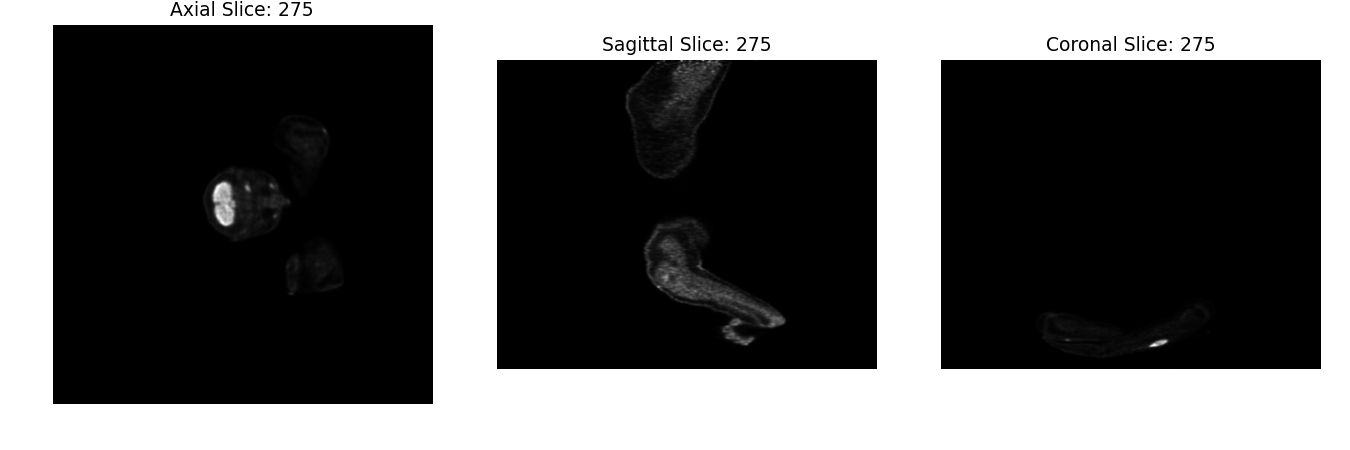

In [13]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

def update(frame):
    # Axial Slice
    ax[0].imshow(pet[:, :, frame], cmap='gray')
    ax[0].set_title(f"Axial Slice: {frame}")
    ax[0].axis('off')

    # Sagittal Slice
    sagittal_slice = frame
    ax[1].imshow(pet[sagittal_slice, :, :].T, cmap='gray')
    ax[1].set_title(f"Sagittal Slice: {sagittal_slice}")
    ax[1].axis('off')

    # Coronal Slice
    coronal_slice = frame
    ax[2].imshow(pet[:, coronal_slice, :].T, cmap='gray')
    ax[2].set_title(f"Coronal Slice: {coronal_slice}")
    ax[2].axis('off')

animation = FuncAnimation(fig, update, frames=pet.shape[2], interval=70)
plt.tight_layout()
plt.show()